# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [165]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import io
# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#remove all whitespace before ',' in csv file otherwise pandas acts weird when doing  data selecting
buffer  = open("census.csv", 'r').read()
buffer = buffer.replace(" ", "")

# Load the Census dataset
#data = pd.read_csv("census.csv")
data = pd.read_csv(io.StringIO(buffer))

print("missing data: ", data.isnull().sum())
# no missing values
# Success - Display the first record
display(data.head(n=10))


missing data:  age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [195]:
n_records = len(data.index)

#Is there a better way to do conditional sum?
n_greater_50k = np.sum(data['income'].apply(lambda x : 0 if  x=='<=50K' else 1))

n_at_most_50k = n_records - n_greater_50k

greater_percent = n_greater_50k / n_records*100.0

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

# mean age of people that makes > 50K
df = data.loc[data['income'] == '>50K']
display(df.head(n=10))
print("Mean age of people who make >50K: ", np.mean(df['age']),
      " mean age of people overall: ",np.mean(data['age']) )
print("Mean education years of people who make >50K: ", np.mean(df['education-num']),
      " mean of people overall: ",np.mean(data['education-num']) )
print("Mean capital gain  of people who make >50K: ", np.mean(df['capital-gain']),
      " mean of people overall: ",np.mean(data['capital-gain']) )
print("Mean capital loss  of people who make >50K: ", np.mean(df['capital-loss']),
      " mean of people overall: ",np.mean(data['capital-loss']) )

N_Husband_50K = len(df[df['relationship'] == 'Husband'].index)
N_Husband = len(data[data['relationship'] == 'Husband'].index)
N_Hours_50K = np.mean(df['hours-per-week'])
N_Hours = np.mean(data['hours-per-week'])

print("Percentages of Husband in people making >50K ", N_Husband_50K/n_greater_50k,
      " Percentages of Husband overall: ",N_Husband/ n_records)
print("Mean hours per week of people who make >50K: ", np.mean(df['hours-per-week']),
      " mean of people overall: ",np.mean(data['hours-per-week']) )

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
10,37,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K
11,30,State-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K
18,43,Self-emp-not-inc,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,45.0,United-States,>50K
19,40,Private,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
24,56,Local-gov,Bachelors,13.0,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
42,57,Federal-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0.0,0.0,40.0,United-States,>50K
48,47,Private,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,1902.0,60.0,Honduras,>50K


Mean age of people who make >50K:  44.00606709493219  mean age of people overall:  38.547941267524656
Mean education years of people who make >50K:  11.598501070663811  mean of people overall:  10.118460041572686
Mean capital gain  of people who make >50K:  3991.7916666666665  mean of people overall:  1101.4303436380524
Mean capital loss  of people who make >50K:  193.48706281227695  mean of people overall:  88.595418159303
Percentages of Husband in people making >50K  0.7590114204139901  Percentages of Husband overall:  0.4127636990845164
Mean hours per week of people who make >50K:  45.69048893647395  mean of people overall:  40.93801689443191


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

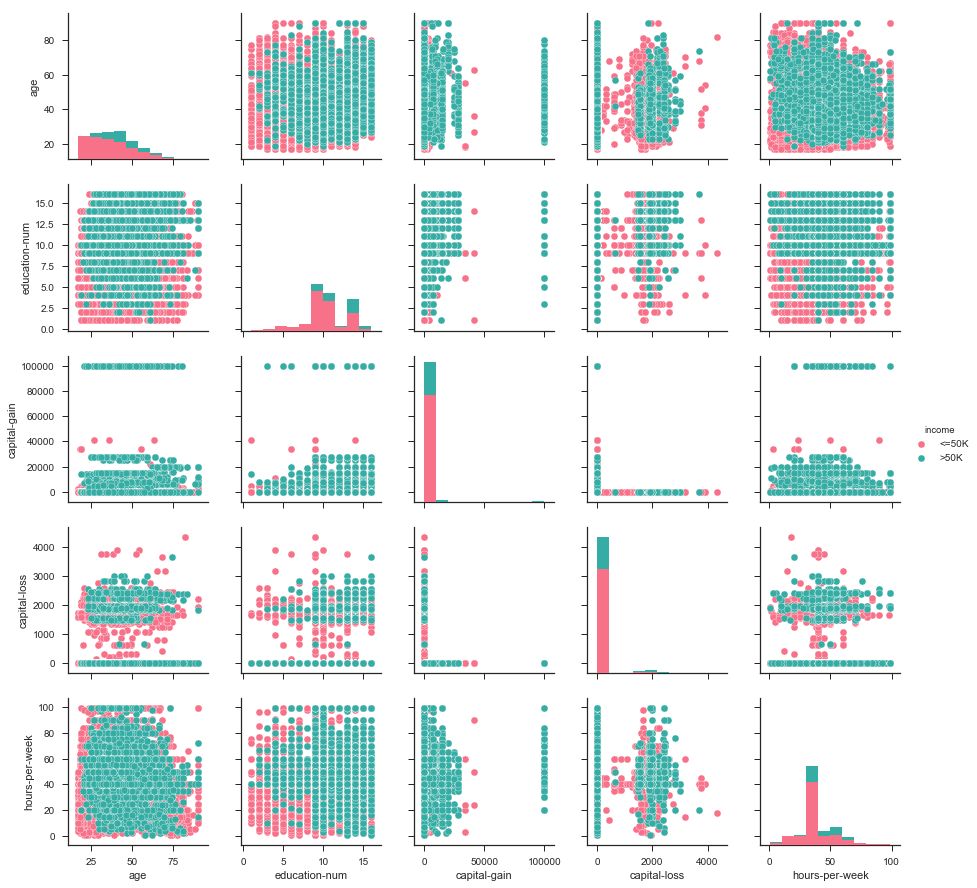

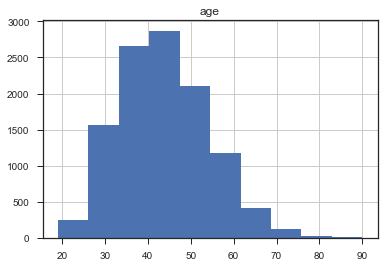

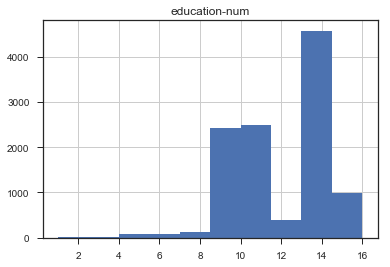

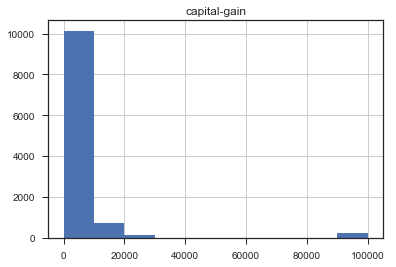

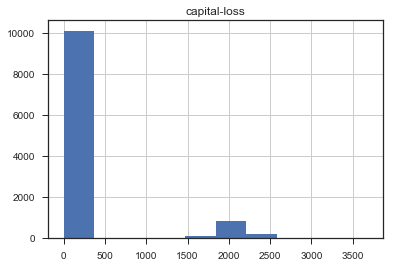

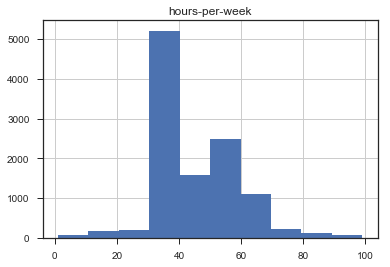

In [132]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue="income", palette="husl")

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
attributes = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
## trying to see if there is any trend I can observe directly from the data.

#plot histogram of attributes that meet >50K income
for i in range(len(attributes)):
    df.hist(column=attributes[i])

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

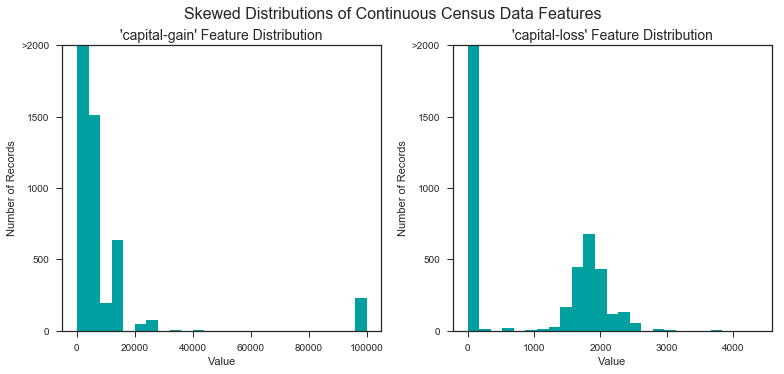

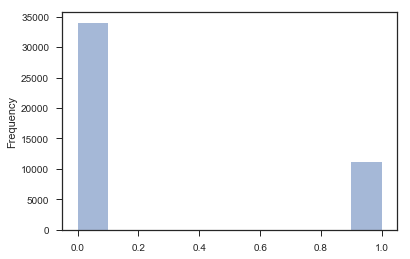

In [167]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
#print(features_raw)
# Visualize skewed continuous features of original data
vs.distribution(data)

## take a look at the income distribution 
import matplotlib.pyplot as plt
df = data['income'].apply(lambda x : 0 if  x=='<=50K' else 1)
plt.figure()
df.plot.hist(alpha=0.5)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

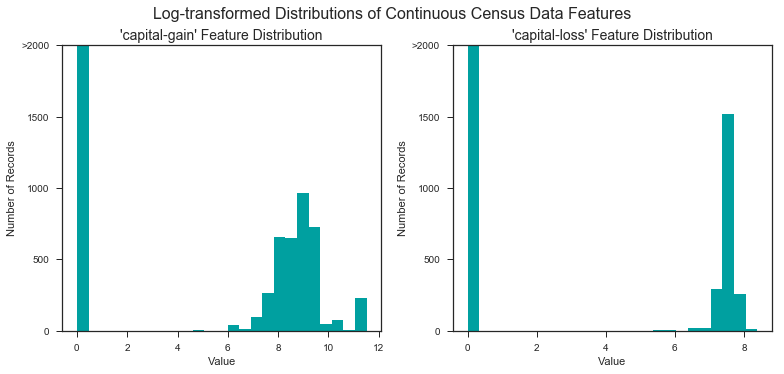

In [168]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [169]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [170]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final =  pd.get_dummies(features_log_minmax_transform)
# so the none numerical features are one-hot encoded and are joined with numerical features
#print(features_final.head(n = 1))

# TODO: Encode the 'income_raw' data to numerical values
income = data['income'].apply(lambda x : 0 if  x=='<=50K' else 1)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_level_10th', 'education_level_11th', 'education_level_12th', 'education_level_1st-4th', 'education_level_5th-6th', 'education_level_7th-8th', 'education_level_9th', 'education_level_Assoc-acdm', 'education_level_Assoc-voc', 'education_level_Bachelors', 'education_level_Doctorate', 'education_level_HS-grad', 'education_level_Masters', 'education_level_Preschool', 'education_level_Prof-school', 'education_level_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.
I think Naive predictor performs very bad.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [171]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP = n_greater_50k
FP = n_records - TP
TN = 0
FN = 0
# TODO: Calculate accuracy, precision and recall
accuracy = n_greater_50k/n_records
recall = TP/(TP + FN)
precision = TP/(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **
I'll be evaluating Decision Trees, AdaBoost and  Support Vector Machine.

Decision Tree:
   - decision tree in real world can be used for data mining, medical diagnosis
   - Decision tree is able to learn sets of if-then rules and represents the learning process as a tree from root to branches. It searches the complete hypothesis space. It tolerates, noisy erros and even missing data. It performs well when a). instances are represented by attribute-value pairs to decision tree. b).Target is a classification decision. c). Training data might be noisy or have errors or have missing values for certain attributes.
   - The weakness of the decision tree is: 1) it tends to be overfitting thus might not generalize well. 2) Greedy algorithms cannot guarantee to return the globally optimal decision tree. 3)Because it favours shortest tree, if one attribute dominates the tree might be heavily biased. It performs poorly when it grow too big/deep that it can't really generalize well for the test data. 
   - I chose decision tree because I think most of the attributes-value pairs are discrete(except for numerical attributes) in this task and fit  decision tree's application domain. For the problem that decision tree might be overfitting I'll search for its best legnth and minimum instance in a node 
 
AdaBoost:
  - AdaBoost in real world is used in conjunction with many other types of learning algorithms to improve their performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. So it can be used in almost any field to boost existing algorithms.
  - The strength of AdaBoost is its ability to adapt in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing (e.g., their error rate is smaller than 0.5 for binary classification), the final model can be proven to converge to a strong learner. 
  - The weakness of the model is that 1) it can't be paralled so the training might take a long time. Each subsequent learner relies on its previous learner's errors to "find its area to focus" so training has to happen sequentially for each iteration. 2) it is sensitive to noisy data because exponential loss function used in AdaBoost is vulnerable to this issue : the error from an outlier will get an exponentially-weighed importance for future learners. So when the application needs to have very short time of training and training data is noisy, it probably doesn't do well.
  - I chose AdaBoost because AdaBoost can use simple decision trees as weak learners to act as a stronger learner. There are 103 total features after one-hot encoding so it makes AdaBoost ideal for the task. And for this learning task, real time training is not really needed. I can run as long as it needs. Also the paper  "http://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf" An Empirical Comparison of Supervised Learning Algorithms presents the conclusion that "With excellent performance on all eight metrics, calibrated boosted trees were the best learning algorithm overall". I'm interested to see if I could replicate the result. 
  
Support Vector Machines:
   - SVM  has been used to classify proteins sequence and medical image and diagnosis in real world.
   - The strength of SVM is: 1). it is one example of empirical risk minimization and it is to lower the theoretical error rate bound to achieve the goal. There are rich math literature to back up the algorithm . 2). Its optimization is done by solving a quadratic programming problem and it has global optimum. 3). It allows using kernel tricks to apply prior domain knowledge. When computation power is not a problem, training and testing time is not constraint and people has certain understanding of the data, SVM should perform well
   - The weakness of SVM is :1). It requires computation power/large memory consumption and training and testing time is longer. 2.) The output of the SVM also relies on the selection of kernel which means prior domain knowledge plays an important role. 3). It doesn't do multiclass classification. Its use is limited to binary classfication. 4). It requires all traning data to be labelled. 5). It might overfit. So when a bad kernel is selected or training is running on resource limited computer, or the task itself is a multiclass nature classification or there are missing data in the training set, SVM will not perform well.
   - I chose SVM because the task itself is a binary classfication. There are 45222 records and all of them are labelled  ( "grep 50K census.csv |wc -l" shows up 45222 = data frame row numbers) and no missing data. The features and records are plenty but not to the extend of being massive and for training and testing time, the task doesn't require realtime. Those things described above seem to suggest that SVM is a good candidate for the task

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [185]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    #print("sample_size: ", sample_size)
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with
    #'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start 
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, average='macro', beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,average='macro', beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    #print(results)
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


/Users/gltest/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


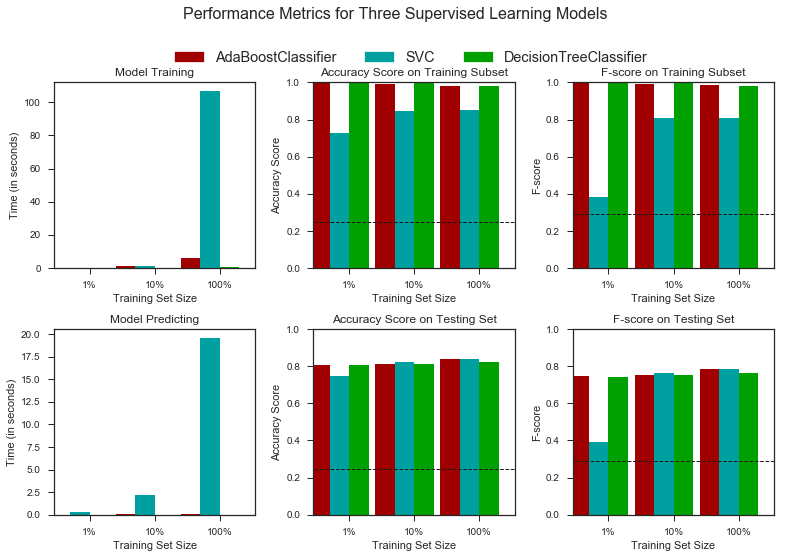

In [186]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 42 )
dt_stump = DecisionTreeClassifier(random_state = 42 ) 
clf_B = AdaBoostClassifier(base_estimator = dt_stump)
clf_C = SVC(random_state =42 )

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
#print("len of y_train: ", len(y_train))
samples_100 = len(y_train)
samples_10 = int(0.1 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        #print(clf.get_params())

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

In [187]:
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

AdaBoostClassifier


,1%,10%,100%
acc_test,0.807850,0.814373,0.836595
acc_train,1.000000,0.993333,0.983333
f_test,0.746850,0.750912,0.784054
f_train,1.000000,0.989395,0.984538
pred_time,0.005343,0.114639,0.067467
train_time,0.005870,1.121594,6.045584


SVC


,1%,10%,100%
acc_test,0.745716,0.825207,0.837369
acc_train,0.730000,0.846667,0.850000
f_test,0.392836,0.764244,0.784056
f_train,0.385835,0.808776,0.811124
pred_time,0.287445,2.232374,19.579620
train_time,0.012318,1.006660,106.490243


DecisionTreeClassifier


,1%,10%,100%
acc_test,0.803980,0.814262,0.820896
acc_train,1.000000,0.996667,0.980000
f_test,0.740999,0.754035,0.763319
f_train,1.000000,0.996933,0.981402
pred_time,0.007292,0.006434,0.006953
train_time,0.003964,0.028171,0.424123


### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
Based on the  graph, I propose AdaBoost to be the appropriate approach for the task. All the testing set data is used, AdaBoost and SVM have the best F-score but SVM takes 20x of time to predict in comparasion to AdaBoost and it is the slowest model in training time. So SVM in terms of time, it is not ideal in this scale of task. That leaves AdaBoost the candidate. 

AdaBoost uses decision tree as weak learners to boost the performance. In each iteration, a weak learner tries to learn data and weighted predicted error is carried over to the next weak learner to better predict. For the data itself, it is not noisy and all properly labelled. The attribute-value pairs are clear for underlying decision tree stump to perform.  I believe if I properly tune the parameters of AdaBoost and overcome decision tree's overfitting tendency, I will have a very good result. 

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 
Boosting is an approach to machine learning based on the idea of creating a highly accurate prediction rule by combining many relatively weak and inaccurate classifiers.  A weak classifier is simply a classifier that performs poorly, but performs better than random guessing. A simple example might be classifying a person as male or female based on

The model basically works as below:
1. select training set for each weak classifer:
Each weak classifier is trained using a random subset of overall training set. 
After training a classifier at any level, ada-boost assigns weight to each training item. Misclassified item is assigned higher weight so that it appears in the training subset of next classifier with higher probability.
After each classifier is trained, the weight is assigned to the classifier as well based on accuracy. More accurate classifier is assigned higher weight so that it will have more impact in final outcome.

2. assign weight to each classifier
A classifier with 50% accuracy is given a weight of zero, and a classifier with less than 50% accuracy is given negative weight. Adaboosts use exp(-x) as possibility ditribution, the negative weights as a matter of fact emphasis the error that needs to be corrected and its label that needs to be predicted right the next time. 

3. Calculate the final output
the final output is just a linear combination of all of the weak classifiers, and then final decision is made by by looking at the sign of this sum.

Resources:
1. http://mccormickml.com/2013/12/13/adaboost-tutorial/
2. http://rob.schapire.net/papers/explaining-adaboost.pdf
3.https://medium.com/machine-learning-101/https-medium-com-savanpatel-chapter-6-adaboost-classifier-b945f330af06



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(random_state = 42) 
clf = AdaBoostClassifier(base_estimator = dt_stump)

predictions = (clf.fit(X_train, y_train)).predict(X_test)

print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8375
F-score on testing data: 0.6818


In [188]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
dt = DecisionTreeClassifier(random_state = 42) 

# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
dt_parameters = {'criterion':['gini','entropy'] ,
                'max_depth': np.arange(2,5,1),
                'min_samples_split':np.arange(50,samples_1,50),
               }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# train a weak learner 
dt_obj = GridSearchCV(dt, dt_parameters,scorer,cv=5, return_train_score = True)
dt_fit = dt_obj.fit(X_train, y_train)
print(dt_fit.best_params_)

dt_stump = dt_fit.best_estimator_
clf = AdaBoostClassifier(base_estimator = dt_stump) 

parameters = {'n_estimators': [20, 50, 80],
             'learning_rate': np.arange(0.1, 1.25, 0.2)
             }

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scorer,cv=5, return_train_score = True)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

print("Best parameters set found on training set:")
print(grid_fit.best_params_)

print("best scores on training set:")
print(grid_fit.best_score_)
    
# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
best_predictions = best_clf.predict(X_test)

print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

{'criterion': 'gini', 'min_samples_split': 300, 'max_depth': 3}
Best parameters set found on training set:
{'learning_rate': 0.30000000000000004, 'n_estimators': 80}
best scores on training set:
0.750353064988

Optimized Model
------
Final accuracy score on the testing data: 0.8735
Final F-score on the testing data: 0.7746


In [196]:
display(pd.DataFrame(grid_obj.cv_results_))

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.173184,0.026515,0.717298,0.720879,0.1,20,"{'learning_rate': 0.1, 'n_estimators': 20}",18,0.720584,0.720526,...,0.710746,0.724643,0.706615,0.718248,0.726848,0.720474,0.006249,0.000345,0.007462,0.002075
1,2.886428,0.052922,0.736561,0.740719,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",13,0.735595,0.738212,...,0.732950,0.743606,0.728565,0.740027,0.749441,0.741902,0.017515,0.000457,0.006984,0.001858
2,4.556521,0.078486,0.745476,0.750263,0.1,80,"{'learning_rate': 0.1, 'n_estimators': 80}",6,0.757221,0.752743,...,0.739167,0.746448,0.730313,0.744942,0.754796,0.753646,0.008587,0.000478,0.009947,0.003773
3,1.163877,0.025725,0.734618,0.743201,0.3,20,"{'learning_rate': 0.3, 'n_estimators': 20}",14,0.738015,0.735221,...,0.735336,0.754445,0.722927,0.739858,0.745333,0.745394,0.004229,0.000239,0.007394,0.006489
4,2.837673,0.051073,0.747374,0.753999,0.3,50,"{'learning_rate': 0.3, 'n_estimators': 50}",4,0.751502,0.747671,...,0.740352,0.756094,0.746138,0.755951,0.754186,0.752158,0.005211,0.000606,0.004929,0.003704
5,4.500945,0.074379,0.750353,0.759078,0.3,80,"{'learning_rate': 0.3, 'n_estimators': 80}",1,0.758917,0.754558,...,0.745025,0.757527,0.744262,0.759822,0.760043,0.760923,0.012977,0.000497,0.007475,0.002789
6,1.150963,0.023781,0.741117,0.747462,0.5,20,"{'learning_rate': 0.5, 'n_estimators': 20}",10,0.739200,0.740053,...,0.739331,0.748350,0.736247,0.752367,0.748818,0.748609,0.008101,0.000310,0.004258,0.004032
7,2.851780,0.048510,0.750070,0.759506,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",2,0.758544,0.757305,...,0.740812,0.756362,0.747488,0.760263,0.760767,0.761914,0.050535,0.000422,0.008153,0.002274
8,4.487091,0.074115,0.749795,0.763717,0.5,80,"{'learning_rate': 0.5, 'n_estimators': 80}",3,0.749681,0.761267,...,0.739933,0.762668,0.749246,0.763662,0.762207,0.762847,0.008881,0.000183,0.007144,0.002343
9,1.150740,0.025294,0.742155,0.749597,0.7,20,"{'learning_rate': 0.7, 'n_estimators': 20}",8,0.746624,0.745538,...,0.736757,0.755397,0.733405,0.746182,0.752739,0.748921,0.008060,0.002545,0.006906,0.003681


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8348       |   0.8735      |
| F-score        |      0.6768       |   0.7746       |


**Answer: **
1. The optimized model has better result than unoptimized result. around 6% boost in accuracy score and 14% better in fbeta score.
2. The result is much better than native predictor benchmark

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

1. feature capital-gain (0.169142)
2. feature age (0.128527)
3. feature capital-loss (0.117158)
4. feature hours-per-week (0.066601)
5. feature education-num (0.047519)
6. feature marital-status_Married-civ-spouse (0.045629)
7. feature workclass_Self-emp-not-inc (0.021489)
8. feature relationship_Wife (0.018559)
9. feature occupation_Other-service (0.015411)
10. feature relationship_Own-child (0.015347)
11. feature occupation_Exec-managerial (0.015153)
12. feature race_Asian-Pac-Islander (0.014168)
13. feature occupation_Farming-fishing (0.014056)
14. feature race_Black (0.012953)
15. feature occupation_Prof-specialty (0.011847)
16. feature occupation_Machine-op-inspct (0.011316)
17. feature relationship_Not-in-family (0.010845)
18. feature occupation_Priv-house-serv (0.010801)
19. feature sex_Male (0.010398)
20. feature sex_Female (0.010172)


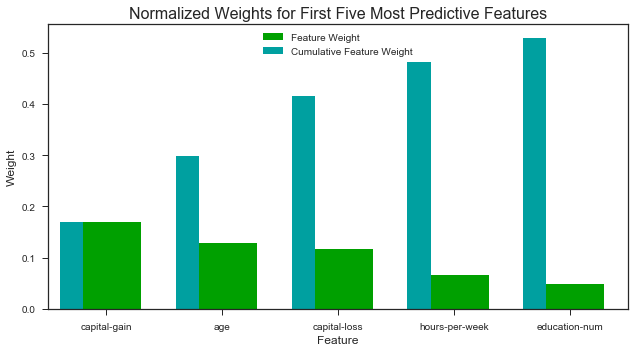

In [189]:
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(20):
    print("%d. feature %s (%f)" % (f + 1, encoded[indices[f]], importances[indices[f]]))
    
vs.feature_plot(importances, X_train, y_train)


### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
After data exploration by hand, I thought initially older people with longer education, married, having capital gain and longer working time will more likely to have income > 50K
Initially I rank in the order :
1. capital gain (the mean gain in people > 50K is  higher than gain in people overall)
2. age  (the mean age in people > 50K is higher than mean age in people over all)
3. marrital_status(the husband rate in people > 50K is higher than husband rate in people overall)
4. education number of years( number of years in education in people > 50K is slightly higher than  number of years in education in overal group, there are 4 peaks in the hist data)
5. hours-per-week (mean working hours of people > 50K is longer than people making less than 50K)


According to actual training result, feature rankings  the 1st 10:
1. feature capital-gain (0.169142)
2. feature age (0.128527)
3. feature capital-loss (0.117158)
4. feature hours-per-week (0.066601)
5. feature education-num (0.047519)
6. feature marital-status_Married-civ-spouse (0.045629)
7. feature workclass_Self-emp-not-inc (0.021489)
8. feature relationship_Wife (0.018559)
9. feature occupation_Other-service (0.015411)
10. feature relationship_Own-child (0.015347)


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

1. feature capital-gain (0.144393)
2. feature capital-loss (0.140306)
3. feature age (0.122861)
4. feature marital-status_Married-civ-spouse (0.120301)
5. feature education-num (0.098394)
6. feature hours-per-week (0.077194)
7. feature occupation_Exec-managerial (0.033760)
8. feature relationship_Wife (0.028000)
9. feature occupation_Farming-fishing (0.024613)
10. feature occupation_Other-service (0.023854)
11. feature occupation_Prof-specialty (0.017146)
12. feature workclass_Self-emp-not-inc (0.016482)
13. feature workclass_Federal-gov (0.016314)
14. feature relationship_Husband (0.015150)
15. feature sex_Male (0.014688)
16. feature workclass_Self-emp-inc (0.011466)
17. feature occupation_Machine-op-inspct (0.010916)
18. feature marital-status_Married-AF-spouse (0.010823)
19. feature occupation_Handlers-cleaners (0.009469)
20. feature occupation_Sales (0.007675)


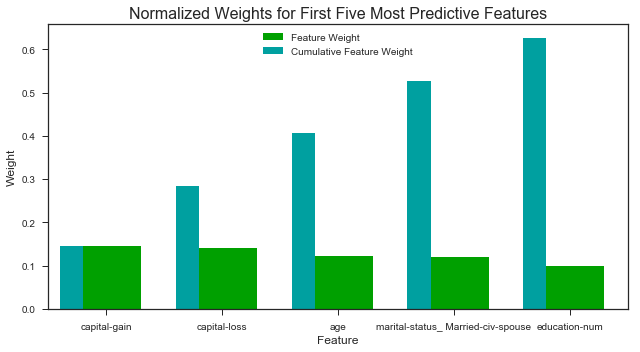

In [190]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# do I have to choose another classifier?
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
GBimportances = model.feature_importances_
indices = np.argsort(GBimportances)[::-1]
for f in range(20):
    print("%d. feature %s (%f)" % (f + 1, encoded[indices[f]], GBimportances[indices[f]]))
    
vs.feature_plot(GBimportances, X_train, y_train)


### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
Using GradientBoostingClassifier, the feature importances rank the best:
1. feature capital-gain (0.144393)
2. feature capital-loss (0.140306)
3. feature age (0.122861)
4. feature marital-status_Married-civ-spouse (0.120301)
5. feature education-num (0.098394)
6. feature hours-per-week (0.077194)


The feature importance in AdaBoost in Q6 is:
1. feature capital-gain (0.169142)
2. feature age (0.128527)
3. feature capital-loss (0.117158)
4. feature hours-per-week (0.066601)
5. feature education-num (0.047519)
6. feature marital-status_Married-civ-spouse (0.045629)

The two models' important features ranking  are not entirely identical but feature selections are the same. For example GBC puts capitcal gain as the most important feature versus my AdaBoosted decision tree puts age as the most important feature.

The AdaBoost result corresponds the initial data exploration well. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [194]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8735
F-score on testing data: 0.7746

Final Model trained on reduced data
------
Accuracy on testing data: 0.8427
F-score on testing data: 0.7198


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
1. If taking out most of the features and only using 5 features, the result is very close to the result of using full set of features.  I think that is mostly because most the features that are reduced don't impact the result at all. For example I printed all feature importance percentage, lots of them in the end are 0.0. 
2. If training time is a factor, yes I would sample first on the trainig set to get an idea of feature importance. As feature importances are seen and none result impacting features are reduced,the traing data amount can also be reduced according to ML dimension theory. Actually in this case, If I use the 10st most important features (one-hot encoding features)rather than 103, I'm getting 0.8642/0.7520 and if I use the first 20 features in the feature set, I'm getting a better score 0.8724/0.7743. So it does look like we don't have to use all the features and data at all.
3. Generally speaking the AdaBoost is able to use all the numerical data to get a very close predition 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.